#Mount on Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/'Deep  Learning Project'

/content/gdrive/My Drive/Deep  Learning Project


#Data preperation

In [3]:
#import required packages
from mlxtend.data import loadlocal_mnist
import numpy as np
from sklearn import neighbors, metrics
from sklearn import svm # This pacakge is used for svm classification
import matplotlib.pyplot as plt
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
from skimage import feature # This pacakge is used for LBP feature extraction
import matplotlib.pyplot as plt #This package is used for data visualization
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#initialize training set
train_image, train_label= loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte',
                      )
#initialize testing set
test_image, test_label= loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte',
                      )

In [0]:
#reshape data into 28*28 pixels
train_data = train_image.reshape(-1,28,28)
test_data = test_image.reshape(-1,28,28)

#LBP Feature Extraction

In [0]:
class LBP:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def getLBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
	  
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

In [0]:
# different combination of paramters of P and R
desc1 = LBP(8,1)
desc2 = LBP(16,2)
desc3 = LBP(24,3)
desc4 = LBP(32,4)

#create lists for extracted features
train1 = []
train2 = []
train3 = []
train4 = []
labels = []

# loop over the training images
for img_index in range(len(train_data)):
	# load the train image, and extract LBP features
    image = (train_data[img_index])
    #image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist1 = desc1.getLBPfeatures(image)
    train1.append(hist1)

    hist2 = desc2.getLBPfeatures(image)
    train2.append(hist2)

    hist3 = desc3.getLBPfeatures(image)
    train3.append(hist3)

    hist4 = desc4.getLBPfeatures(image)
    train4.append(hist4)

    # extract the label from the image path, then update the
	  # label and data lists
    labels.append(train_label[img_index])

	# extract the label from the image path, then update the label and data lists

In [0]:
# train a SVM clasifier on the training data
# Initialize the SVM model
SVM = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
# Start training the SVM classifier 
SVM.fit(train1, labels)
print("Train set Accuracy: {:.2f}".format(SVM.score(train1,labels)))

Train set Accuracy: 0.42


In [0]:
# train a SVM clasifier on the training data
# Initialize the SVM model
SVM_l = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
# Start training the SVM classifier 
SVM_l.fit(train2, labels)
print("Train set Accuracy: {:.2f}".format(SVM_l.score(train2,labels)))

Train set Accuracy: 0.58


In [0]:
# train a SVM clasifier on the training data
# Initialize the SVM model
SVM_l2 = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
# Start training the SVM classifier 
SVM_l2.fit(train3, labels)
print("Train set Accuracy: {:.2f}".format(SVM_l2.score(train3,labels)))

Train set Accuracy: 0.60


In [0]:
# train a SVM clasifier on the training data
# Initialize the SVM model
SVM = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
# Start training the SVM classifier 
SVM.fit(train4, labels)
print("Train set Accuracy: {:.2f}".format(SVM.score(train4,labels)))

Train set Accuracy: 0.56


##Hyperparameter tuning

In [0]:
c_range = [0.1,1,10,100]
#gamma_range = [0.1,1,10,100]
#kernels_op = ['linear','rbf','poly']
accuracy = []

for c in c_range:
  SVM = svm.SVC(C=c, kernel='rbf', gamma=0.1, random_state=42)
  SVM.fit(train3, labels)
  accuracy.append(SVM.score(train3, labels))

print(accuracy)
      

[0.18515, 0.3153666666666667, 0.4466333333333333, 0.5462666666666667]


In [0]:
gamma_range = [0.1,1,10,100]
#kernels_op = ['linear','rbf','poly']
accuracy = []

for g in gamma_range:
  SVM = svm.SVC(C=100.0, kernel='rbf', gamma=g, random_state=42)
  SVM.fit(train3, labels)
  accuracy.append(SVM.score(train3, labels))

print(accuracy)

[0.5462666666666667, 0.591, 0.6161166666666666, 0.6570333333333334]


In [0]:
kernels_op = ['rbf','poly']
accuracy = []

for k in kernels_op:
  SVM = svm.SVC(C=100.0, kernel=k, gamma=100, random_state=42)
  SVM.fit(train3, labels)
  accuracy.append(SVM.score(train3, labels))

print(accuracy)

[0.6570333333333334, 0.6356]


#HOG feature extraction

In [0]:
train_h1 = []
train_h2 = []
train_h3 = []

label = []
# loop over the training images
for img_index in range(len(train_data)):
  # load the image, and extract HOG features
  image_h = (train_data[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hog_1 = feature.hog(image_h, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  hog_2 = feature.hog(image_h, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1-sqrt")
  hog_3 = feature.hog(image_h, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  train_h1.append(hog_1)
  train_h2.append(hog_2)
  train_h3.append(hog_3)
  label.append(train_label[img_index])

In [0]:
# train a SVM clasifier with HOG feature extraction
# Initialize the SVM model with the best performing parameter set
SVM_h1 = svm.SVC(C=100.0, kernel='rbf', gamma = 100, random_state=42)
# Start training the SVM classifier 
SVM_h1.fit(train_h1, label)
print("Train set Accuracy: {:.2f}".format(SVM_h1.score(train_h1,label)))

Train set Accuracy: 1.00


In [0]:
# train a SVM clasifier with HOG feature extraction
# Initialize the SVM model with the best performing parameter set
SVM_h2 = svm.SVC(kernel='rbf',C=100.0, gamma = 100, random_state=42)
# Start training the SVM classifier 
SVM_h2.fit(train_h2, label)
print("Train set Accuracy: {:.2f}".format(SVM_h2.score(train_h2,label)))

Train set Accuracy: 1.00


In [0]:
# train a SVM clasifier with HOG feature extraction
# Initialize the SVM model with the best performing parameter set
SVM_h3 = svm.SVC(kernel='rbf',C=100.0, random_state=42)
# Start training the SVM classifier 
SVM_h3.fit(train_h3, label)
print("Train set Accuracy: {:.2f}".format(SVM_h3.score(train_h3,label)))

Train set Accuracy: 1.00


#Evaluation on test set

##Test set evaluation on LBP feature extraction

In [0]:
pred_data_l =[]

for im_idx in range(len(test_data)):
  image_test = test_data[im_idx]
  
  # Extract LBP feature
  hist_test = desc3.getLBPfeatures(image_test)
  # Perform classification prediction
  prediction = SVM_l2.predict(hist_test.reshape(1,-1))
  
  # Store the classfication result
  pred_data_l.append(prediction)

accuracy = metrics.accuracy_score(test_label, pred_data_l)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.6151


##Test set evaluation on HOG feature extraction

In [0]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(test_data)):
  # load the image, and extract HOG features
  img=test_data[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(8,8),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = SVM_h3.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(test_label[img_ind])

Extracting features from test dataset...


In [0]:
# Test set Accuracy
accuracy = metrics.accuracy_score(labels_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.971


#Experimental Results

##Confusion Matrix

In [0]:
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Accuracy',cmap=plt.cm.Reds):

  if normalize:
    cm =cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.figure(figsize=(12,12))
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",color="white" if cm[i,j]> thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

Normalized confusion matrix
[[9.92857143e-01 1.02040816e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.08163265e-03 2.04081633e-03
  0.00000000e+00 0.00000000e+00]
 [2.64317181e-03 9.88546256e-01 1.76211454e-03 8.81057269e-04
  1.76211454e-03 0.00000000e+00 1.76211454e-03 1.76211454e-03
  8.81057269e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.73837209e-01 6.78294574e-03
  1.93798450e-03 0.00000000e+00 9.68992248e-04 1.35658915e-02
  2.90697674e-03 0.00000000e+00]
 [9.90099010e-04 9.90099010e-04 6.93069307e-03 9.68316832e-01
  0.00000000e+00 4.95049505e-03 9.90099010e-04 3.96039604e-03
  7.92079208e-03 4.95049505e-03]
 [9.16496945e-03 2.03665988e-03 0.00000000e+00 1.01832994e-03
  9.64358452e-01 0.00000000e+00 8.14663951e-03 1.01832994e-03
  4.07331976e-03 1.01832994e-02]
 [2.24215247e-03 1.12107623e-03 0.00000000e+00 1.45739910e-02
  1.12107623e-03 9.66367713e-01 5.60538117e-03 2.24215247e-03
  6.72645740e-03 0.00000000e+00]
 [5.21920668e-03 2.08768267e-0

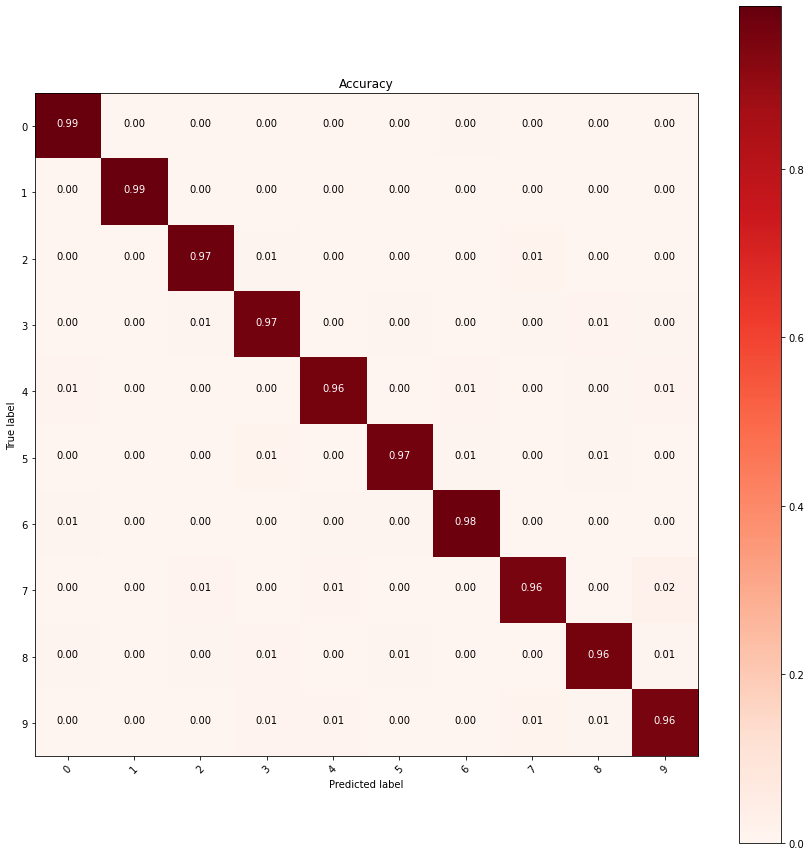

In [0]:
Con_Matrix = metrics.confusion_matrix(labels_test,predict_test)

plot_confusion_matrix(Con_Matrix,["0","1","2","3","4","5","6","7","8","9"],normalize=True)

##Evaluation
this section will evaluate on the low experimental results obatined from LBP feature extraction

In [0]:
#Stroing all wrong predicted values in a list
wrong_pred = []
i = 0
for true, prediction in zip(test_label, pred_data_l):
    if true != prediction:
        wrong_pred.append(i)
    i = i + 1

In [0]:
#print the total number of wrong predictions
np.shape(wrong_pred)

(3849,)

[1479 2358]


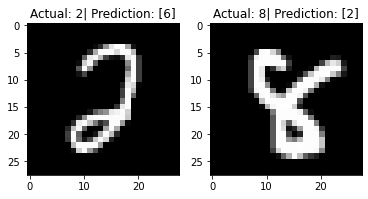

In [0]:
#randomly select 2 wrong predictions for visualization
random_list = np.random.randint(len(wrong_pred), size = 2)
print(random_list)
plot = 1
plt.figure()
for randomNum in random_list:
    plt.subplot(1,len(random_list),plot)
    imageIndex = wrong_pred[randomNum]
    plt.imshow(test_data[imageIndex], cmap = 'gray')
    plt.title("Actual: " + str(test_label[imageIndex]) + "| Prediction: " + str(pred_data_l[imageIndex]))
        
    plot = plot + 1

In [0]:
test_data[1479]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  50, 105, 105, 184, 113, 105,
        105,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

It is discovered that the variance of the intensity values within the region that have feature information is very low, LBP is not the best technique with the nature of MNIST 